# Traffic Station Data Analysis

## Loading the Dataset

##### I'll retrieve the contents of your dataset to understand the data structure, columns, and content.

In [2]:
import pandas as pd

# Try to load the dataset with a different delimiter and handle potential irregularities
data = pd.read_csv('638_trafikkstasjon-eksport.csv', delimiter=';', on_bad_lines='skip')

# Display the first few rows and basic information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VEGOBJEKT-ID            81 non-null     object 
 1   TYPE-ID                 80 non-null     float64
 2   VERSJON                 80 non-null     float64
 3   FØRSTE FOREKOMST        80 non-null     float64
 4   STARTDATO               80 non-null     object 
 5   SLUTTDATO               0 non-null      float64
 6   SIST MODIFISERT         80 non-null     object 
 7   NAVN                    80 non-null     object 
 8   LINK TIL INFOSIDER      80 non-null     object 
 9   TILLEGGSINFORMASJON     1 non-null      object 
 10  GEOMETRI, PUNKT         80 non-null     object 
 11  LOK.KOMMUNE             80 non-null     object 
 12  LOK.KOMMUNENUMMER       80 non-null     float64
 13  LOK.FYLKE               80 non-null     object 
 14  LOK.FYLKESNUMMER        80 non-null     floa

(  VEGOBJEKT-ID  TYPE-ID  VERSJON  FØRSTE FOREKOMST   STARTDATO  SLUTTDATO  \
 0    154788377    638.0      2.0               1.0  2023-01-05        NaN   
 1    154788378    638.0      1.0               1.0  2008-01-15        NaN   
 2    154788379    638.0      1.0               1.0  2008-01-15        NaN   
 3    154788381    638.0      2.0               1.0  2023-01-05        NaN   
 4    154788382    638.0      1.0               1.0  2008-01-15        NaN   
 
        SIST MODIFISERT                         NAVN  \
 0  2024-09-16T15:47:35  Kristiansund trafikkstasjon   
 1  2024-08-22T15:13:58   Sunndalsøra trafikkstasjon   
 2  2024-08-26T11:58:49         Ørsta trafikkstasjon   
 3  2024-04-25T09:57:39     Steinkjer trafikkstasjon   
 4     2024-10-15T18:28       Levanger servicekontor   
 
                                   LINK TIL INFOSIDER TILLEGGSINFORMASJON  ...  \
 0  https://www.vegvesen.no/om-oss/kontakt-oss/tra...                 NaN  ...   
 1  https://www.vegvesen.no/

## Data Cleaning & Preprocessing

##### We'll check if there are any missing values or irregularities that need to be handled.

In [3]:
# Step 1: Check the percentage of missing values per column
missing_values = data.isnull().mean() * 100

# Step 2: Identify columns with high percentages of missing data (e.g., more than 50%)
columns_to_drop = missing_values[missing_values > 50].index.tolist()

# Step 3: Drop irrelevant or mostly missing columns
cleaned_data = data.drop(columns=columns_to_drop)

# Display columns removed and the first few rows of the cleaned data
columns_removed = columns_to_drop
cleaned_data.head(), columns_removed


(  VEGOBJEKT-ID  TYPE-ID  VERSJON  FØRSTE FOREKOMST   STARTDATO  \
 0    154788377    638.0      2.0               1.0  2023-01-05   
 1    154788378    638.0      1.0               1.0  2008-01-15   
 2    154788379    638.0      1.0               1.0  2008-01-15   
 3    154788381    638.0      2.0               1.0  2023-01-05   
 4    154788382    638.0      1.0               1.0  2008-01-15   
 
        SIST MODIFISERT                         NAVN  \
 0  2024-09-16T15:47:35  Kristiansund trafikkstasjon   
 1  2024-08-22T15:13:58   Sunndalsøra trafikkstasjon   
 2  2024-08-26T11:58:49         Ørsta trafikkstasjon   
 3  2024-04-25T09:57:39     Steinkjer trafikkstasjon   
 4     2024-10-15T18:28       Levanger servicekontor   
 
                                   LINK TIL INFOSIDER  \
 0  https://www.vegvesen.no/om-oss/kontakt-oss/tra...   
 1  https://www.vegvesen.no/om-oss/kontakt-oss/tra...   
 2  https://www.vegvesen.no/om-oss/kontakt-oss/tra...   
 3  https://www.vegvesen.no/om

In [4]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying columns with missing values and the count
missing_values[missing_values > 0]


TYPE-ID                    1
VERSJON                    1
FØRSTE FOREKOMST           1
STARTDATO                  1
SLUTTDATO                 81
SIST MODIFISERT            1
NAVN                       1
LINK TIL INFOSIDER         1
TILLEGGSINFORMASJON       80
GEOMETRI, PUNKT            1
LOK.KOMMUNE                1
LOK.KOMMUNENUMMER          1
LOK.FYLKE                  1
LOK.FYLKESNUMMER           1
LOK.RIKSVEGRUTE           57
LOK.KONTRAKTSOMRÅDE       19
LOK.VEGSYSTEMREFERANSE     1
LOK.VEGKATEGORI            1
LOK.FASE                   1
LOK.VEGNUMMER              1
LOK.STREKNING              1
LOK.DELSTREKNING           1
FRA METER                  1
TIL METER                  1
VEGLENKESEKVENSID          1
STARTPOSISJON              1
SLUTTPOSISJON              1
STREKNING.RETNING         26
SIDEPOSISJON              24
KJØREFELT                 81
TYPEVEG                    1
LENGDE                     1
MOR                       81
BARN                      35
GEOMETRI      

In [5]:
# Filter data for county "Norway" (if this is the name provided in the dataset)
# Checking the unique values in 'LOK.FYLKE' to confirm if "Norway" is listed as a specific county
unique_counties = data['LOK.FYLKE'].unique()
unique_counties


array(['Møre og Romsdal', 'Trøndelag', 'Oslo', 'Akershus', 'Innlandet',
       'Rogaland', 'Vestland', 'Agder', 'Østfold', 'Telemark', 'Vestfold',
       'Buskerud', 'Finnmark', 'Nordland', 'Troms', nan], dtype=object)

In [6]:
# Filter data for cities "Norway" (if this is the name provided in the dataset)
# Checking the unique values in 'LOK.FYLKE' to confirm if "Norway" is listed as a specific county
unique_cities = data['LOK.KOMMUNE'].unique()
unique_cities

array(['Kristiansund', 'Sunndal', 'Ørsta', 'Steinkjer', 'Levanger',
       'Namsos', 'Molde', 'Ørland', 'Ålesund', 'Trondheim', 'Stjørdal',
       'Orkland', 'Oppdal', 'Røros', 'Oslo', 'Asker', 'Frogn',
       'Lillestrøm', 'Kongsvinger', 'Lillehammer', 'Tynset', 'Sel',
       'Nord-Aurdal', 'Gjøvik', 'Eigersund', 'Haugesund', 'Sauda',
       'Sandnes', 'Sunnfjord', 'Stad', 'Sogndal', 'Voss', 'Ullensvang',
       'Arendal', 'Sarpsborg', 'Ullensaker', 'Hamar', 'Bergen', 'Stord',
       'Kristiansand', 'Skien', 'Tinn', 'Notodden', 'Tønsberg', 'Larvik',
       'Kongsberg', 'Ringerike', 'Gol', 'Lier', 'Vadsø', 'Rana', 'Senja',
       'Løten', 'Alta', 'Narvik', 'Brønnøy', 'Porsanger', 'Alstahaug',
       'Vefsn', 'Sortland', 'Harstad', 'Fauske', 'Vågan', 'Elverum',
       'Kvæfjord', 'Lindesnes', 'Balsfjord', 'Indre Østfold', 'Nordreisa',
       'Hammerfest', 'Tromsø', 'Bodø', 'Evje og Hornnes', 'Vestvågøy',
       'Sør-Varanger', 'Flekkefjord', nan], dtype=object)

# Data Visualization

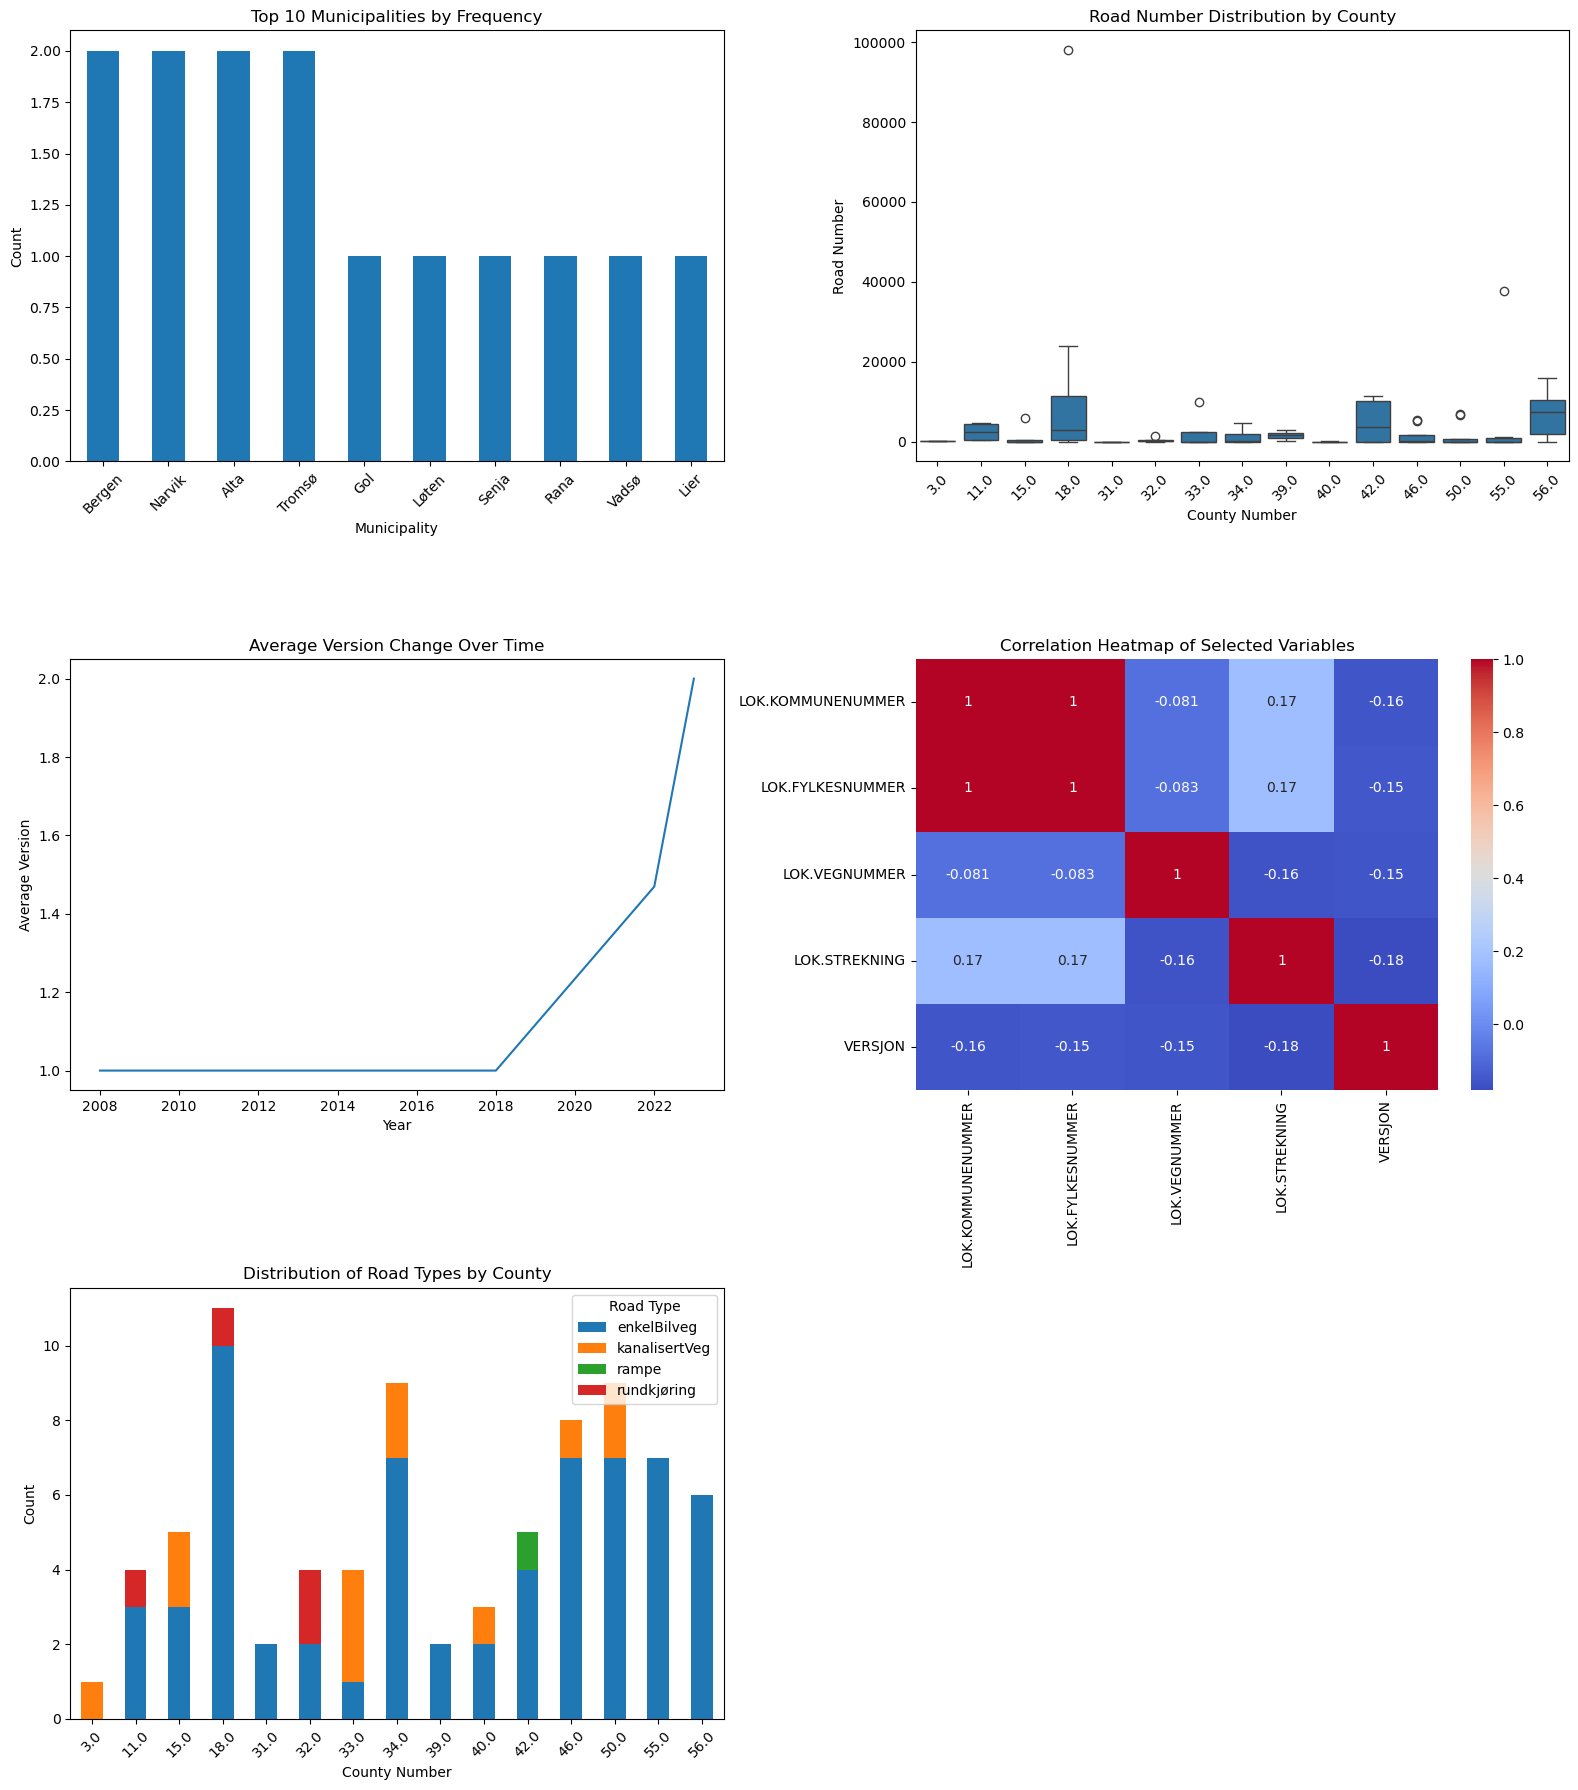

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure size for multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Visualization for all five analyses

# Set up figure size for multiple subplots


# 1. Distribution Analysis by Municipality (Top 10 municipalities)
top_municipalities = cleaned_data['LOK.KOMMUNE'].value_counts().head(10)
top_municipalities.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Municipalities by Frequency')
axes[0, 0].set_xlabel('Municipality')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Road Number Trends by County
sns.boxplot(data=cleaned_data, x='LOK.FYLKESNUMMER', y='LOK.VEGNUMMER', ax=axes[0, 1])
axes[0, 1].set_title('Road Number Distribution by County')
axes[0, 1].set_xlabel('County Number')
axes[0, 1].set_ylabel('Road Number')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Version Analysis Over Time
# Convert 'STARTDATO' to datetime for analysis
cleaned_data['STARTDATO'] = pd.to_datetime(cleaned_data['STARTDATO'], errors='coerce')
version_over_time = cleaned_data.groupby(cleaned_data['STARTDATO'].dt.year)['VERSJON'].mean().dropna()
version_over_time.plot(ax=axes[1, 0])
axes[1, 0].set_title('Average Version Change Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Version')

# 4. Deeper Correlation Insights
# Highlight correlation between selected columns
selected_columns = ['LOK.KOMMUNENUMMER', 'LOK.FYLKESNUMMER', 'LOK.VEGNUMMER', 'LOK.STREKNING', 'VERSJON']
correlation_matrix_selected = cleaned_data[selected_columns].corr()
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap of Selected Variables')

# 5. Categorical Analysis of Road Types by County
road_types_county = cleaned_data.groupby(['LOK.FYLKESNUMMER', 'TYPEVEG']).size().unstack().fillna(0)
road_types_county.plot(kind='bar', stacked=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Road Types by County')
axes[2, 0].set_xlabel('County Number')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend(title='Road Type')

# Adjust layout to make space for the plots
fig.tight_layout()

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Display the plots
plt.show()


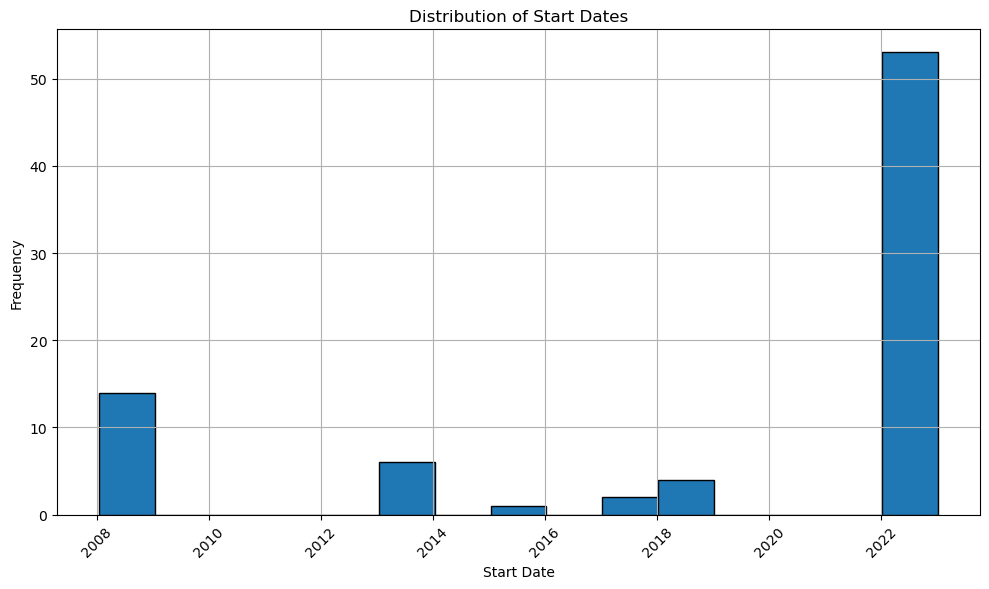

In [11]:
import matplotlib.pyplot as plt

# Convert 'STARTDATO' to datetime for better visualization
data['STARTDATO'] = pd.to_datetime(data['STARTDATO'], errors='coerce')

# Plot 1: Distribution of Start Dates
plt.figure(figsize=(10, 6))
data['STARTDATO'].dropna().hist(bins=15, edgecolor='black')
plt.title('Distribution of Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




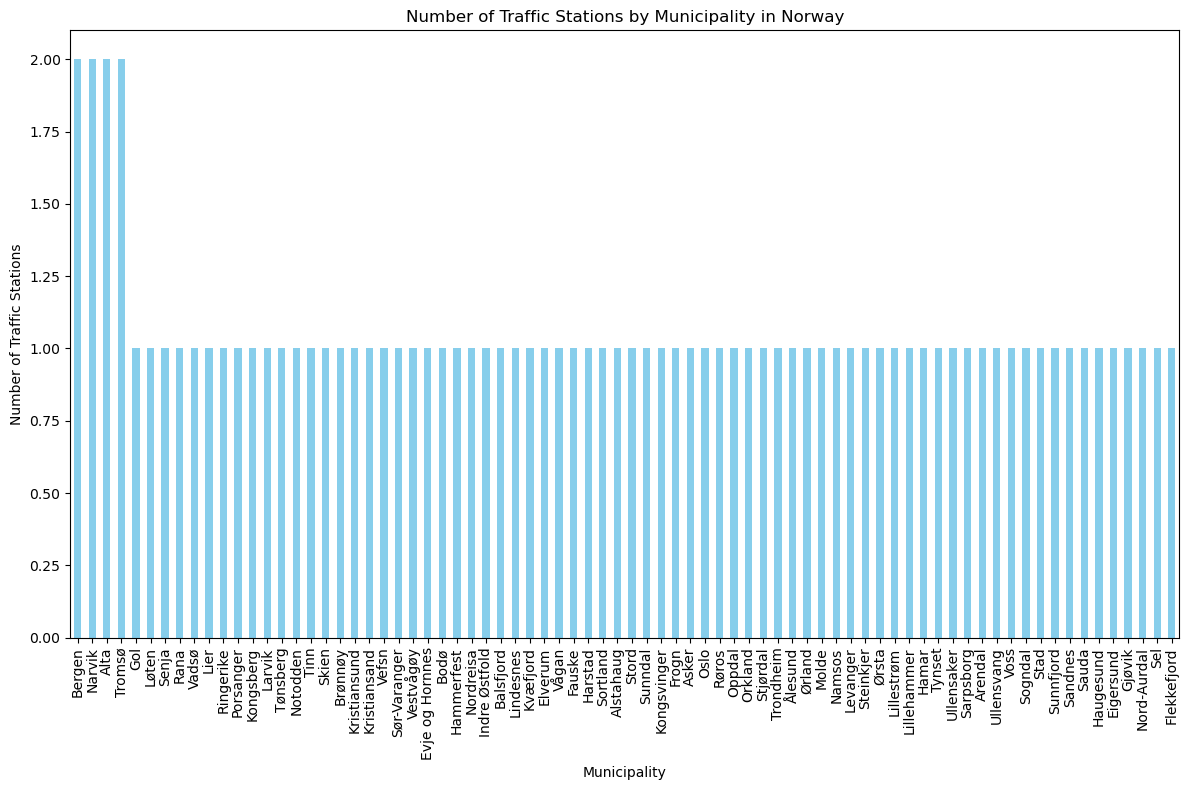

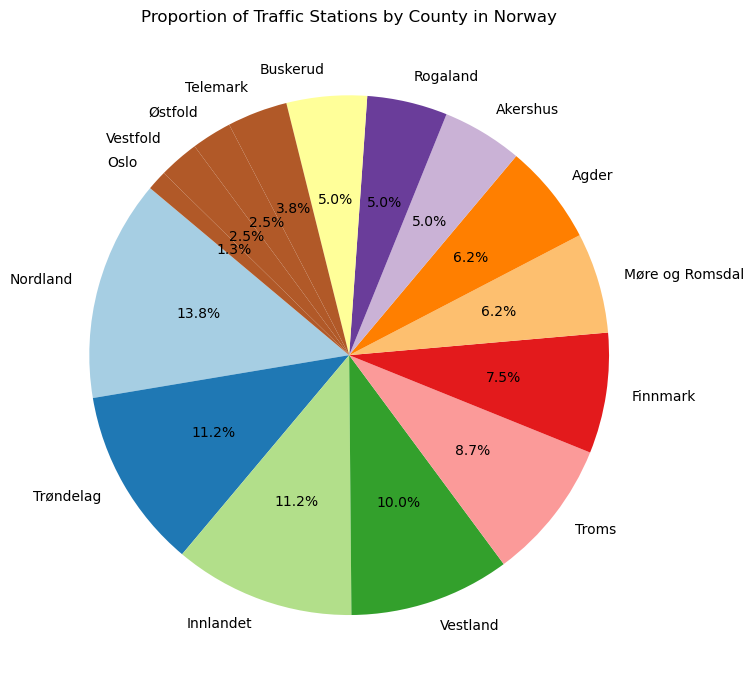

In [12]:
# Plot 1: Traffic Station Count by Municipality (Bar Chart)
plt.figure(figsize=(12, 8))
data['LOK.KOMMUNE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Traffic Stations by Municipality in Norway')
plt.xlabel('Municipality')
plt.ylabel('Number of Traffic Stations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 2: Traffic Stations by County (Pie Chart)
county_data = data['LOK.FYLKE'].value_counts()
plt.figure(figsize=(10, 7))
county_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(county_data))))
plt.title('Proportion of Traffic Stations by County in Norway')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.tight_layout()
plt.show()



In [14]:
# Applying the updated extraction pattern to get correct Longitude and Latitude
cleaned_data[['Longitude', 'Latitude']] = cleaned_data['GEOMETRI'].str.extract(r'POINT Z?\(([^ ]+) ([^ ]+) [^ ]+\)').astype(float)

# Check the extracted coordinates to verify if they are valid
valid_coords = cleaned_data.dropna(subset=['Latitude', 'Longitude'])

# Display the first few rows of valid coordinates to ensure extraction was successful
valid_coords[['Longitude', 'Latitude']].head()


,Longitude,Latitude
0,136086.621,7018355.692
1,170672.409,6965834.140
2,36908.068,6926561.783
3,329140.357,7104550.973
4,317394.971,7074051.443


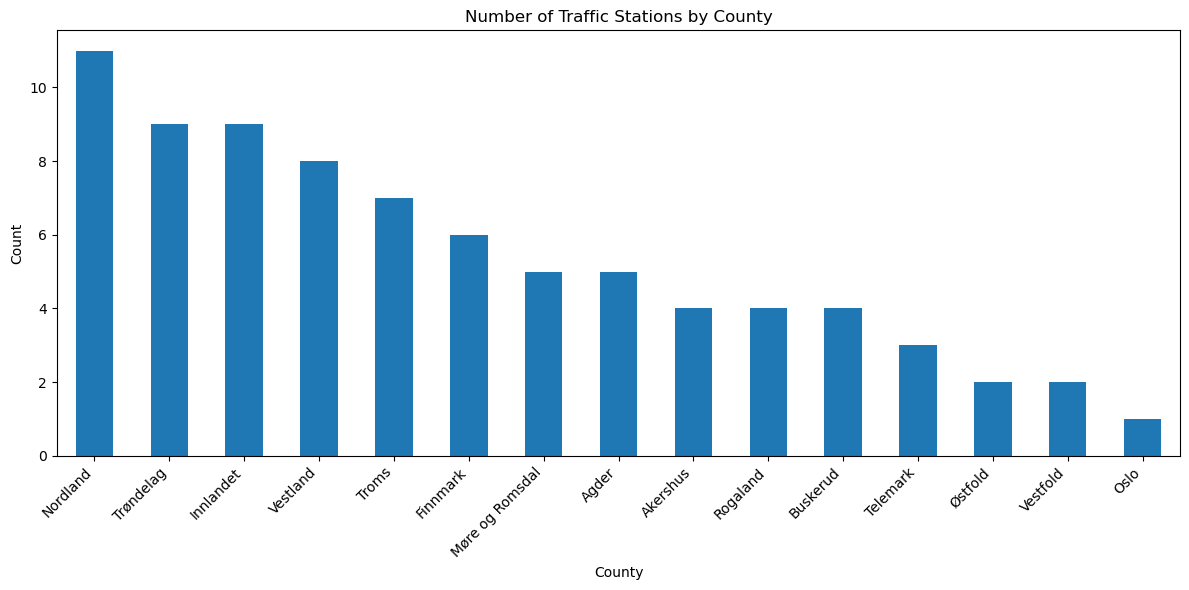

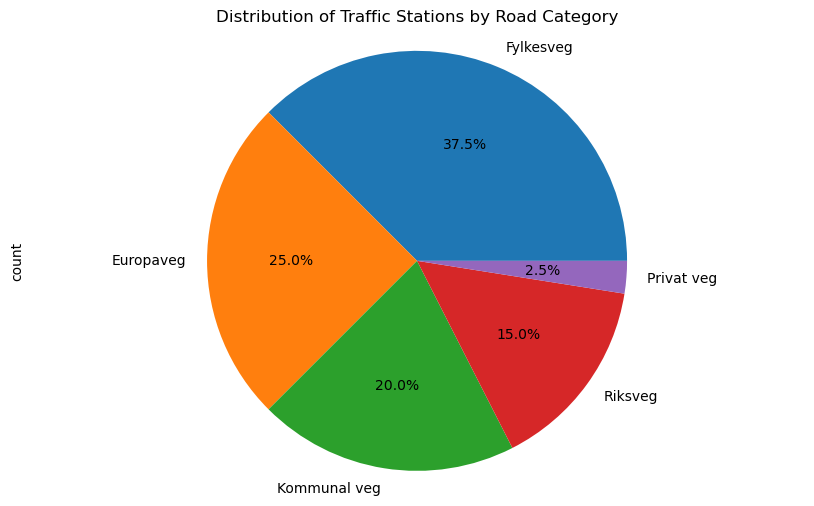


Summary of numeric columns:
       TYPE-ID    VERSJON  FØRSTE FOREKOMST  LOK.KOMMUNENUMMER  \
count     80.0  80.000000              80.0          80.000000   
mean     638.0   1.337500               1.0        3636.762500   
std        0.0   0.501737               0.0        1477.564008   
min      638.0   1.000000               1.0         301.000000   
25%      638.0   1.000000               1.0        1868.750000   
50%      638.0   1.000000               1.0        3678.000000   
75%      638.0   2.000000               1.0        5006.250000   
max      638.0   3.000000               1.0        5622.000000   

       LOK.FYLKESNUMMER  LOK.VEGNUMMER  LOK.STREKNING  LOK.DELSTREKNING  \
count         80.000000      80.000000      80.000000         80.000000   
mean          36.187500    4136.475000      21.837500          2.062500   
std           14.788889   12155.760572      44.341438          5.774987   
min            3.000000       3.000000       1.000000          1.000000   
2

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create some visualizations

# 1. Count of traffic stations by county (LOK.FYLKE)
plt.figure(figsize=(12, 6))
cleaned_data['LOK.FYLKE'].value_counts().plot(kind='bar')
plt.title('Number of Traffic Stations by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Count by road category (LOK.VEGKATEGORI)
plt.figure(figsize=(10, 6))
cleaned_data['LOK.VEGKATEGORI'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Traffic Stations by Road Category')
plt.axis('equal')
plt.show()

# Basic statistics
print("\nSummary of numeric columns:")
numeric_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
print(cleaned_data[numeric_cols].describe())


## Analyze specific road categories in more detail

##### To analyze specific road categories in more detail, I'll first filter the dataset by the 'LOK.VEGKATEGORI' column to identify unique categories and their distributions, then visualize these categories to understand their geographical spread and frequency. Let's proceed with this analysis.

Road Category Distribution:
LOK.VEGKATEGORI
Fylkesveg       30
Europaveg       20
Kommunal veg    16
Riksveg         12
Privat veg       2
Name: count, dtype: int64


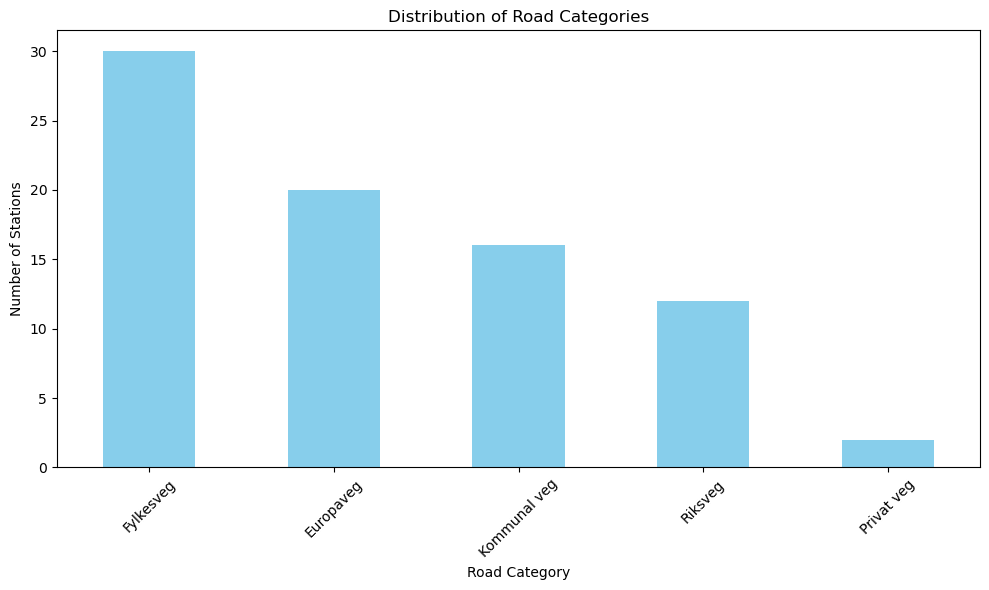

In [25]:
# Analyze the distribution of road categories
road_category_counts = cleaned_data['LOK.VEGKATEGORI'].value_counts()

# Display the distribution
print("Road Category Distribution:")
print(road_category_counts)

# Visualize the distribution of road categories
plt.figure(figsize=(10, 6))
road_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Road Categories')
plt.xlabel('Road Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The analysis of road categories shows a clear distribution, with 'Fylkesveg' being the most common category, followed by 'Europaveg', 'Kommunal veg', 'Riksveg', and 'Privat veg'. This distribution is visualized in the bar chart below, which provides a clear view of the frequency of each road category.

### The relationship between station age and modifications

To examine the relationship between station age and modifications, I'll calculate the age of each station based on the 'FØRSTE FOREKOMST' date and compare it with the 'SIST MODIFISERT' date to determine the frequency and timing of modifications. This will help identify any patterns or trends in how often stations are updated or modified over time. Let's proceed with this analysis.

Basic Statistics of Station Age and Modifications:
       Station Age (days)                SIST MODIFISERT
count           79.000000                             79
mean         19571.063291  2023-08-02 13:53:52.607595008
min          19255.000000            2022-09-20 11:04:20
25%          19345.000000     2022-12-19 10:47:09.500000
50%          19408.000000            2023-02-20 10:37:30
75%          19883.000000     2024-06-09 11:44:11.500000
max          20013.000000            2024-10-17 09:49:04
std            285.865279                            NaN


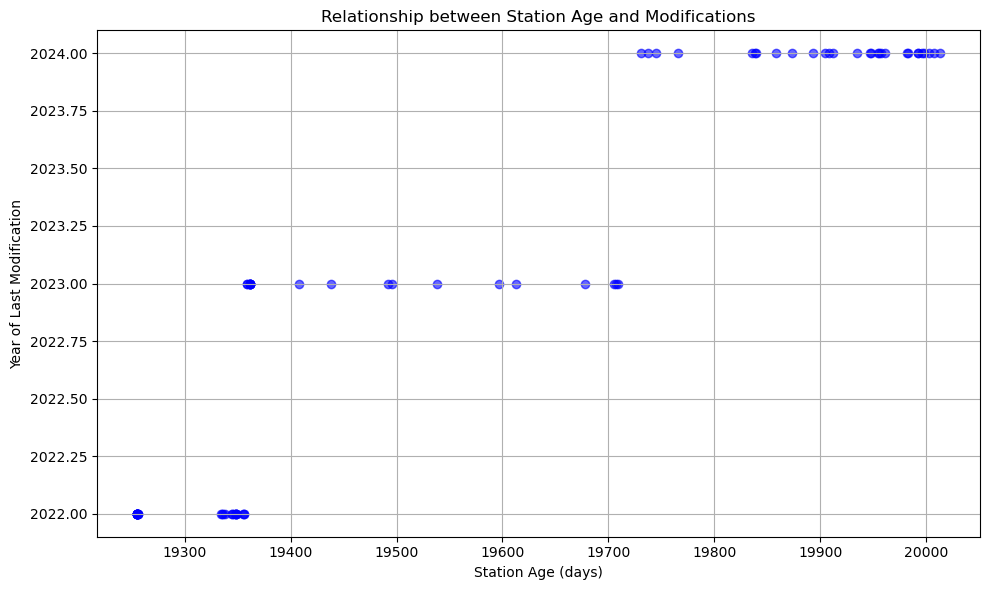

In [28]:
# Convert date columns to datetime format
cleaned_data['FØRSTE FOREKOMST'] = pd.to_datetime(cleaned_data['FØRSTE FOREKOMST'], errors='coerce')
cleaned_data['SIST MODIFISERT'] = pd.to_datetime(cleaned_data['SIST MODIFISERT'], errors='coerce')

# Calculate the age of each station in days
cleaned_data['Station Age (days)'] = (cleaned_data['SIST MODIFISERT'] - cleaned_data['FØRSTE FOREKOMST']).dt.days

# Display basic statistics about station age and modifications
print("Basic Statistics of Station Age and Modifications:")
print(cleaned_data[['Station Age (days)', 'SIST MODIFISERT']].describe())

# Visualize the relationship between station age and modifications
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Station Age (days)'], cleaned_data['SIST MODIFISERT'].dt.year, alpha=0.6, c='blue')
plt.title('Relationship between Station Age and Modifications')
plt.xlabel('Station Age (days)')
plt.ylabel('Year of Last Modification')
plt.grid(True)
plt.tight_layout()
plt.show()